# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

## Book 3: Pre-Processing 2, Initial Modelling

Author: Patrick Smith

Date: 01/04/2024

Contact: patrick.b.smith@gmail.com

         *                 *                  *              *
                                                      *             *
                        *            *                             ___
  *               *                                          |     | |
        *              _________##                 *        / \    | |
                      @\\\\\\\\\##    *     |              |--o|===|-|
  *                  @@@\\\\\\\\##\       \|/|/            |---|   |p|
                    @@ @@\\\\\\\\\\\    \|\\|//|/     *   /     \  |b|
             *     @@@@@@@\\\\\\\\\\\    \|\|/|/         |  U    | |s|
                  @@@@@@@@@----------|    \\|//          |  K    |=| |                                                                                                                       

## Description of Variables 

| Column                         | Descriptor                                                                 | Datatype |
|--------------------------------|----------------------------------------------------------------------------|----------|
| Year                           | The period in which the event occurred.                                    | int32    |
| Quarter                        | Quarter of the year (Q1=1, Q2=2, Q3=3, Q4=4).                              | object   |
| Nationality                    | Nationality of the individual.                                             | object   |
| Region                         | World region of the country of nationality for the individual.              | object   |
| Return type group              | Grouped type of return (enforced, voluntary, refused entry at port).         | object   |
| Return type                    | Specific type of return (enforced, voluntary, refused entry).               | object   |
| Age                            | Age of the individual at the time of the event.                             | object   |
| Sex                            | Gender of the individual (male, female, other/unknown).                     | int32    |
| Return destination group       | Grouped destination country for return (Home country, EU, Other country).   | object   |
| Return destination             | Specific destination country for return.                                    | object   |
| Number of returns              | Count of returns.                                                           | float64  |
| Visa type group                | Grouped type of sponsored work visa applied for.                            | object   |
| Visa type subgroup             | Detailed type of sponsored work visa applied for.                           | object   |
| Applicant type                 | Type of applicant (main applicant, dependant).                             | object   |
| Case outcome                   | Outcome of the case (granted, refused, withdrawn, resettlement).             | object   |
| Decisions                      | Number of decisions made.                                                   | float64  |
| Case type                      | Type of case (asylum, resettlement).                                       | object   |
| Case outcome group             | Grouped outcome of the case (granted protection, grant of other leave, refused, withdrawn). | object   |
| UASC                           | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child.       | object   |
| Host Country                   | Country where the individual first sought asylum for resettlement cases.    | object   |
| Location of application        | Location where the application was submitted.                               | object   |
| Applications                   | Number of applications made.                                               | float64  |
| Occupation                     | Occupation of the individual.                                              | object   |
| Industry                       | Industry sector for which the application to work was made.                 | object   |
| SOC code                       | Standard Occupational Classification code.                                 | object   |
| Occ. major group               | Major group classification of the occupation.                              | object   |
| Occ. sub-major group           | Sub-major group classification of the occupation.                          | object   |
| Occ. minor group               | Minor group classification of the occupation.                              | object   |
| Occ. unit group                | Unit group classification of the occupation.                               | object   |
| Category of leave group        | Grouped category of extension applied for (work, study, family, other).     | object   |
| Category of leave              | Category of extension applied for.                                         | object   |
| Category of leave subgroup     | Detailed category of extension applied for.                                | object   |
| Current category of leave group| Grouped current category of leave (work, study, family, other).            | object   |
| Current category of leave      | Current category of leave.                                                 | object   |
| Previous category of leave group | Grouped previous category of leave (work, study, family, other).         | object   |
| Previous category of leave     | Previous category of leave.                                                | object   |
| Sex_Male                       | Dummy variable for male (1 if male, 0 otherwise).                          | object   |
| Sex_Female                     | Dummy variable for female (1 if female, 0 otherwise).                      | object   |
| Sex_Other                      | Dummy variable for other or NA (1 if other/unknown, 0 otherwise).          | object   |
| UK Region                      | The UK region in which the citizenship ceremony took place.                | object   |

## Table of Contents - Book 3

[Preprocessing: Case Outcome](#Case_Outcome) 

[Preprocessing: Visa Outcome](#Visa_Outcomes) 

[Preprocessing: Age](#Age) 

[Baseline Modelling](#B_Model)


## Data Loading

<div id='Load'></div>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

## Next Objective

1) Pre-Processing
2) Focus on dependent variable, case outcome
3) Further improve data quality by imputation
4) Begin baseline modelling
5) Split the data into train and test sets
6) Try several different simplier models to get started
7) Plots and univariate and bivariate distribution
8) Initial insights and conclusions to shareholders

Now the dataset is mostly cleanand has limited null values, we're going to focus focusing on the relevance of each feature 'Case outcome' without worrying about completeness until later

Our strategy for baseline modelling will be to use a simple model like logistic regression using both numerical and categorical variables

For categorical we can one-hot encode them later so we can use them in the machine model

In [2]:
#see max columns
pd.options.display.max_columns = None

Reading the data from book 2 and displaying a sample

In [3]:
df_combined = pd.read_csv(r'C:\Users\kamik\Downloads\df_combined_EDA_2.csv', low_memory=False)

In [60]:
df_combined.sample(5)

,Year,Quarter,Nationality,Region,Return type group,Return type,Age,Sex,Return destination group,Number of returns,Visa type group,Applicant type,Case outcome,Decisions,Case type,Case outcome group,UASC,Application type,Grants,Applications,Occupation,Industry,Occ. major group,Occ. sub-major group,Occ. minor group,Occ. unit group,General_Region,Total Application and Decisions
760704,2021,2,North Macedonia,Europe Other,NaN,NaN,Unknown,3,NaN,NaN,NaN,NaN,Sponsored Work Visa,1.0,Sponsored Work Visa,Sponsored Work Visa,Non-UASC,NaN,0.0,1.0,2119 - natural and social science professional...,education,professional occupations,"science, research, engineering and technology ...",natural and social science professionals,natural and social science professionals n.e.c.,Europe,1.0
1007420,2021,1,Burundi,Africa Sub-Saharan,NaN,NaN,Unknown,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Africa,0.0
271862,2010,4,Indonesia,Asia South East,NaN,NaN,Unknown,3,NaN,NaN,Visitor,All,Issued,232.0,Issued,Issued,Non-UASC,NaN,0.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Asia,232.0
530943,2016,2,Sweden,EU 14,NaN,NaN,30 to 49,2,NaN,NaN,NaN,NaN,Issued,0.0,Issued,Issued,Non-UASC,Naturalisation based on residence,1.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Europe,0.0
466325,2015,1,Turkey,Europe Other,Refused entry at port and subsequently departed,Verified Returns,30 to 49,1,EU Member State,9.0,NaN,NaN,Refused,9.0,Refused,Refused,Non-UASC,NaN,0.0,0.0,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Europe,0.0


Checking for duplicates again, we made a lot of imputations

In [5]:
df_combined.duplicated().sum()

40099

Ok great we can get rid of another 40K duplicates

In [6]:
clean_df = df_combined.drop_duplicates()

print(f"We have {clean_df.shape[0]} rows and {clean_df.shape[1]} columns with string, floats and integers in our clean data.")

We have 972626 rows and 28 columns with string, floats and integers in our clean data.


Moving the data to clean_df again

Checking for nas

In [7]:
clean_df.isna().sum()/df_combined.shape[0]*100

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                  73.352786
Return type                        73.352786
Age                                 0.000000
Sex                                 0.000000
Return destination group           73.352786
Number of returns                  73.352786
Visa type group                    69.209805
Applicant type                     52.167666
Case outcome                        0.750549
Decisions                           0.000000
Case type                           0.750549
Case outcome group                  0.750549
UASC                                0.750549
Application type                   83.737244
Grants                              0.000000
Applications                        0.000000
Occupation                          0.000000
Industry                            0.000000
Occ. major

OK we can work on some of these now, then do the rest later:
Return type group                  73.352786
Return type                        73.352786
Return destination group           73.352786
Number of returns                  73.352786
Visa type group                    69.209805
Applicant type                     52.167666

In [8]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                   0.000000
Return type                         0.000000
Age                                 0.000000
Sex                                 0.000000
Return destination group            0.000000
Number of returns                   0.000000
Visa type group                     0.000000
Applicant type                      0.000000
Case outcome                        0.000000
Decisions                          21.999103
Case type                           0.000000
Case outcome group                  0.000000
UASC                                0.000000
Application type                    0.000000
Grants                             78.000897
Applications                       84.375700
Occupation                          0.000000
Industry                            0.000000
Occ. major

Let's look at 'Grants' and 'Applications' now

In [9]:
clean_df['Grants'].value_counts()

Grants
0.0       758657
1.0        90537
2.0        28513
3.0        15216
4.0         9996
           ...  
662.0          1
926.0          1
1954.0         1
1330.0         1
554.0          1
Name: count, Length: 1040, dtype: int64

In [10]:
clean_df['Applications'].value_counts()

Applications
0.0       820660
1.0        78656
2.0        22358
3.0        10667
4.0         6633
           ...  
1435.0         1
605.0          1
2319.0         1
355.0          1
562.0          1
Name: count, Length: 756, dtype: int64

We still have a lot of 0s in Grants and Applications

Now are going to combine conditions for Age, so we can update for grants and total applications and decisions

We check NA values or values equal to 0 in each column
Apply the update, then calculate the number of rows updated

In [11]:
import numpy as np

condition_age_specific = (clean_df['Age'] == '18 to 29') | (clean_df['Age'] == 'Child')

condition_grants_na_or_zero = clean_df['Grants'].isna() | (clean_df['Grants'] == 0)
condition_total_app_dec_na_or_zero = clean_df['Total Application and Decisions'].isna() | (clean_df['Total Application and Decisions'] == 0)
condition_applications_na_or_zero = clean_df['Applications'].isna() | (clean_df['Applications'] == 0)

clean_df.loc[condition_age_specific & condition_grants_na_or_zero, 'Grants'] = clean_df.loc[condition_age_specific, 'Decisions']
clean_df.loc[condition_age_specific & condition_total_app_dec_na_or_zero, 'Total Application and Decisions'] = clean_df.loc[condition_age_specific, 'Decisions']
clean_df.loc[condition_age_specific & condition_applications_na_or_zero, 'Applications'] = clean_df.loc[condition_age_specific, 'Decisions']

matching_rows_grants_updated = (condition_age_specific & condition_grants_na_or_zero).sum()
matching_rows_total_app_dec_updated = (condition_age_specific & condition_total_app_dec_na_or_zero).sum()
matching_rows_applications_updated = (condition_age_specific & condition_applications_na_or_zero).sum()

print(f"Rows updated where 'Grants' was NA or 0: {matching_rows_grants_updated}")
print(f"Rows updated where 'Total Application and Decisions' was NA or 0: {matching_rows_total_app_dec_updated}")
print(f"Rows updated where 'Applications' was NA or 0: {matching_rows_applications_updated}")


Rows updated where 'Grants' was NA or 0: 181539
Rows updated where 'Total Application and Decisions' was NA or 0: 112291
Rows updated where 'Applications' was NA or 0: 194697


Worked well - let's see how many 0s are in the df now

In [12]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                   0.000000
Return type                         0.000000
Age                                 0.000000
Sex                                 0.000000
Return destination group            0.000000
Number of returns                   0.000000
Visa type group                     0.000000
Applicant type                      0.000000
Case outcome                        0.000000
Decisions                          21.999103
Case type                           0.000000
Case outcome group                  0.000000
UASC                                0.000000
Application type                    0.000000
Grants                             59.336065
Applications                       67.782272
Occupation                          0.000000
Industry                            0.000000
Occ. major

This made a meaningful difference

Let's look at Decisions now, one of our main numerical columns

In [13]:
clean_df['Decisions'].value_counts()

Decisions
1.0        297547
0.0        213969
2.0        109350
3.0         60015
4.0         39048
            ...  
13448.0         1
3898.0          1
80342.0         1
10791.0         1
3797.0          1
Name: count, Length: 4864, dtype: int64

And 'Case outcome', our dependent feature column

In [14]:
clean_df['Case outcome'].value_counts()

Case outcome
Issued                  579805
Refused                 188160
Sponsored Work Visa     166352
Temporary Protection     15187
Withdrawn                10522
Resettlements             2738
Other Grants              2261
Name: count, dtype: int64

Now we're going to look at outcomes from the 'Case outcome' column

Then update 'Grants' to match 'Decisions' for specific outcomes, 'Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants'

For the others, Grants and Total Application and Decisions, we will match it with the other condition, from 'Decisions'

In [16]:
specific_outcomes = ['Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants']

for outcome in specific_outcomes:
    condition = clean_df['Case outcome'] == outcome
    clean_df.loc[condition, 'Grants'] = clean_df.loc[condition, 'Decisions']

other_conditions = ~clean_df['Case outcome'].isin(specific_outcomes)
clean_df.loc[other_conditions, ['Grants', 'Total Application and Decisions', 'Applications']] = clean_df.loc[other_conditions, 'Decisions']

updated_rows_specific_outcomes = clean_df[clean_df['Case outcome'].isin(specific_outcomes)]['Grants'].count()
updated_rows_other_outcomes = clean_df[other_conditions]['Grants'].count()

print(f"Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants') to match 'Decisions': {updated_rows_specific_outcomes}")
print(f"Rows updated for other outcomes to match 'Decisions': {updated_rows_other_outcomes}")

#REF: Chatgpt

Rows updated for specific outcomes ('Sponsored Work Visa', 'Temporary Protection', 'Resettlements', 'Other Grants') to match 'Decisions': 186538
Rows updated for other outcomes to match 'Decisions': 786088


Look at percentage of 0s again

In [17]:
zero_percentage_numeric2 = (clean_df == 0).sum() / clean_df.shape[0] * 100
print(zero_percentage_numeric2)

Year                                0.000000
Quarter                             0.000000
Nationality                         0.000000
Region                              0.000000
Return type group                   0.000000
Return type                         0.000000
Age                                 0.000000
Sex                                 0.000000
Return destination group            0.000000
Number of returns                   0.000000
Visa type group                     0.000000
Applicant type                      0.000000
Case outcome                        0.000000
Decisions                          21.999103
Case type                           0.000000
Case outcome group                  0.000000
UASC                                0.000000
Application type                    0.000000
Grants                             21.999103
Applications                       24.074516
Occupation                          0.000000
Industry                            0.000000
Occ. major

Checking uniques

In [18]:
clean_df.nunique()

Year                                 23
Quarter                               4
Nationality                         239
Region                               17
Return type group                     3
Return type                           6
Age                                   7
Sex                                   3
Return destination group              4
Number of returns                   326
Visa type group                       6
Applicant type                        5
Case outcome                          7
Decisions                          4864
Case type                             5
Case outcome group                    6
UASC                                  4
Application type                      4
Grants                             4864
Applications                       4864
Occupation                          325
Industry                             23
Occ. major group                     12
Occ. sub-major group                 29
Occ. minor group                     98


We can see that grants and applications have the same unique numbers, occupation has a lot of uniques well

In future iterations we can reduce the number of nationality by setting minimums

We can also look at dropping more columns, such as Grants or Applications

Other columns we can improve through further imputations are: Return destination group, Number of returns, Application type, and Return Type

OK let's move on to baseline modelling

### Baseline Modelling: Logistic Regression

<div id='B_Modelling'></div>

First we will select columns with low to no missing values for the baseline model

We will create a new DataFrame, called model_df, with selected columns, we can add and remove them later if neccesary

In [20]:

columns_for_model = [
    'Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex',
    'Decisions', 'Grants', 'Applications', 'Total Application and Decisions', 
    'General_Region', 'Occ. major group', 'Occ. sub-major group',
    'Case outcome', 'Case outcome group', 'Case type'
]

model_df = clean_df[columns_for_model].copy()

model_df.head()


,Year,Quarter,Nationality,Region,Age,Sex,Decisions,Grants,Applications,Total Application and Decisions,General_Region,Occ. major group,Occ. sub-major group,Case outcome,Case outcome group,Case type
0,2001,1,Afghanistan,Asia Central,Unknown,3,2652.0,2652.0,2652.0,2652.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Issued,Grant of Other Leave,Asylum Case
1,2001,1,Afghanistan,Asia Central,Unknown,3,809.0,809.0,0.0,809.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Temporary Protection,Grant of Protection,Asylum Case
2,2001,1,Afghanistan,Asia Central,Unknown,3,15.0,15.0,15.0,15.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Refused,Refused,Asylum Case
3,2001,1,Afghanistan,Asia Central,Unknown,3,88.0,88.0,88.0,88.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Refused,Refused,Asylum Case
4,2001,1,Afghanistan,Asia Central,Unknown,3,609.0,609.0,609.0,609.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Refused,Refused,Asylum Case


Let's take a look at what the df looks like, per sample

In [61]:
model_df.sample(5)

,Year,Quarter,Nationality,Region,Age,Sex,Decisions,Grants,Applications,Total Application and Decisions,General_Region,Occ. major group,Occ. sub-major group,Case outcome,Case outcome group,Case type
604248,2018,1,Poland,EU 8,18 to 29,1,9.0,9.0,9.0,9.0,Europe,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Issued,Issued,Issued
313079,2011,3,Kazakhstan,Asia Central,Under 18,2,0.0,0.0,0.0,0.0,Asia,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Issued,Issued,Issued
428228,2014,1,Central African Republic,Africa Sub-Saharan,30 to 49,1,1.0,1.0,1.0,1.0,Africa,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Issued,Issued,Issued
51277,2005,3,Uganda,Africa Sub-Saharan,50 to 69,2,0.0,0.0,0.0,0.0,Africa,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Issued,Issued,Issued
23618,2004,4,South Africa,Africa Sub-Saharan,Under 18,3,1.0,1.0,1.0,1.0,Africa,Non-Work Visa Related Case Outcome,Non-Work Visa Related Case Outcome,Refused,Refused,Refused


In [21]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 972626 entries, 0 to 1012724
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             972626 non-null  int64  
 1   Quarter                          972626 non-null  int64  
 2   Nationality                      972626 non-null  object 
 3   Region                           972626 non-null  object 
 4   Age                              972626 non-null  object 
 5   Sex                              972626 non-null  int64  
 6   Decisions                        972626 non-null  float64
 7   Grants                           972626 non-null  float64
 8   Applications                     972626 non-null  float64
 9   Total Application and Decisions  972626 non-null  float64
 10  General_Region                   972625 non-null  object 
 11  Occ. major group                 972626 non-null  object 
 12  Occ. s

Let's also make a numeric_df to extract all the integers and floats

This is because many other rows are categorical and objects

In [22]:
numeric_df = model_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

In [23]:
#see the data summarized
numeric_df.describe()

,Year,Quarter,Sex,Decisions,Grants,Applications,Total Application and Decisions
count,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000
mean,2015.043282,2.495117,2.209752,56.110036,56.110036,55.917428,56.110036
std,5.968705,1.101547,0.848818,1306.586153,1306.586153,1306.579042,1306.586153
min,2001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2015.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,2021.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,4.000000,3.000000,234827.000000,234827.000000,234827.000000,234827.000000


OK this is good for now, we can probably drop Grants later

Maybe we can combined year and quarter again later as well

Let's look at correlation to "Decisions"

In [66]:
corr_with_grants = corr_matrix["Decisions"].sort_values(ascending=False)

print(corr_with_grants)


Decisions                          1.000000
Grants                             1.000000
Total Application and Decisions    1.000000
Applications                       0.999988
Sex                                0.036437
Quarter                           -0.000259
Year                              -0.006828
Name: Decisions, dtype: float64


Looks like none of these have much correlation at all. Let's figure out something else - we need more data from the categorical columns

Although it's not exactly that useful in this situion, we can plot all these using scatter_matrix

We can try this again later when we get the df working with the categorical columns

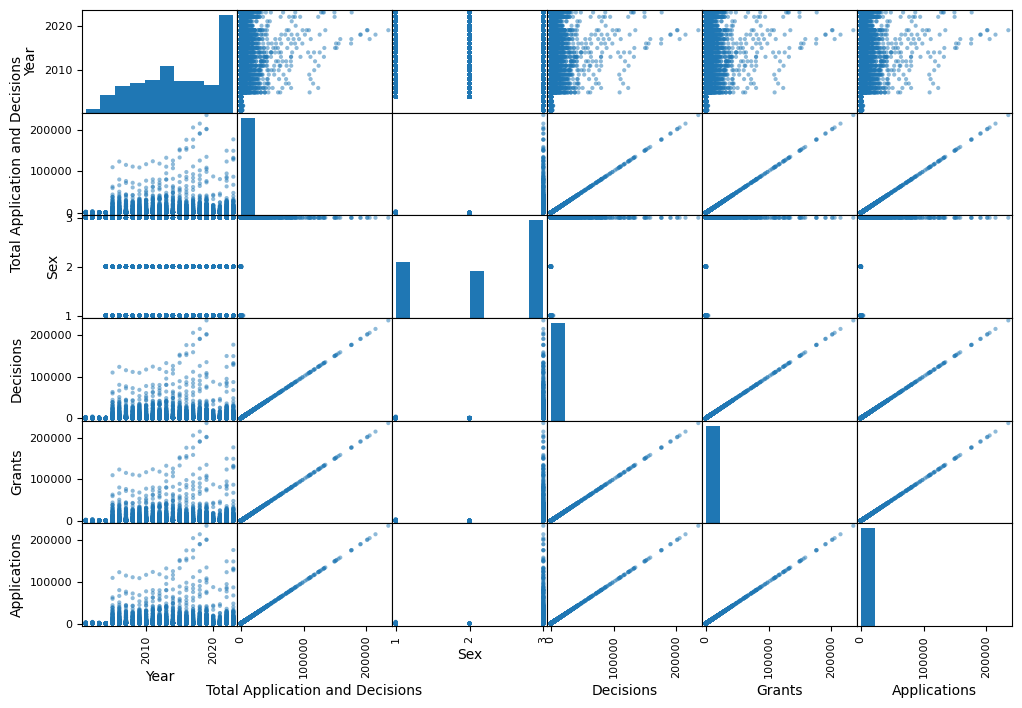

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["Year", "Total Application and Decisions", "Sex", "Decisions", "Grants", "Applications"]
scatter_matrix(model_df[attributes], figsize=(12, 8))
plt.show()

#REF: O'Reily - Aurelien Geron book

Now we will make an encoded df using pd with the get_dummies function

This encodes all the categorical columns using boolean, True or False

Downside is this make a ton of columns, but its ok for now

We can change the scope of the dataset later

In [27]:
encoded_df = pd.get_dummies(model_df)

corr_matrix_encoded = encoded_df.corr()

In [47]:
encoded_df.head()

,Year,Quarter,Sex,Decisions,Grants,Applications,Total Application and Decisions,Nationality_Afghanistan,Nationality_Albania,Nationality_Algeria,Nationality_American Samoa (United States),Nationality_Andorra,Nationality_Angola,Nationality_Anguilla (British),Nationality_Antigua and Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Aruba (Dutch),Nationality_Australia,Nationality_Austria,Nationality_Azerbaijan,"Nationality_Bahamas, The",Nationality_Bahrain,Nationality_Bangladesh,Nationality_Barbados,Nationality_Belarus,Nationality_Belgium,Nationality_Belize,Nationality_Benin,Nationality_Bermuda (British),Nationality_Bhutan,Nationality_Bolivia,Nationality_Bosnia and Herzegovina,Nationality_Botswana,Nationality_Brazil,Nationality_British overseas citizens,Nationality_Brunei,Nationality_Bulgaria,Nationality_Burkina Faso,Nationality_Burundi,Nationality_Cambodia,Nationality_Cameroon,Nationality_Canada,Nationality_Cape Verde,Nationality_Cayman Islands (British),Nationality_Central African Republic,Nationality_Chad,Nationality_Chile,Nationality_China,Nationality_Christmas Island (Australian),Nationality_Colombia,Nationality_Comoros,Nationality_Congo,Nationality_Congo (Democratic Republic),Nationality_Costa Rica,Nationality_Croatia,Nationality_Cuba,Nationality_Curacao (Dutch),Nationality_Cyprus,Nationality_Cyprus (Northern part of),Nationality_Czechia,Nationality_Denmark,Nationality_Djibouti,Nationality_Dominica,Nationality_Dominican Republic,Nationality_East Timor,Nationality_Ecuador,Nationality_Egypt,Nationality_El Salvador,Nationality_Equatorial Guinea,Nationality_Eritrea,Nationality_Estonia,Nationality_Eswatini,Nationality_Ethiopia,Nationality_Faroe Islands,Nationality_Federated States of Micronesia,Nationality_Fiji,Nationality_Finland,Nationality_Former Yugoslavia,Nationality_France,Nationality_French Guiana (French),Nationality_French Southern & Antarctic Territories,Nationality_Gabon,"Nationality_Gambia, The",Nationality_Georgia,Nationality_Germany,Nationality_Ghana,Nationality_Gibraltar (British),Nationality_Greece,Nationality_Grenada,Nationality_Guadeloupe (French),Nationality_Guatemala,Nationality_Guinea,Nationality_Guinea-Bissau,Nationality_Guyana,Nationality_Haiti,Nationality_Honduras,Nationality_Hong Kong,Nationality_Hungary,Nationality_Iceland,Nationality_India,Nationality_Indonesia,Nationality_Iran,Nationality_Iraq,Nationality_Ireland,Nationality_Israel,Nationality_Italy,Nationality_Ivory Coast,Nationality_Jamaica,Nationality_Japan,Nationality_Jordan,Nationality_Kazakhstan,Nationality_Kenya,Nationality_Kiribati,Nationality_Kosovo,Nationality_Kuwait,Nationality_Kyrgyzstan,Nationality_Laos,Nationality_Latvia,Nationality_Lebanon,Nationality_Lesotho,Nationality_Liberia,Nationality_Libya,Nationality_Liechtenstein,Nationality_Lithuania,Nationality_Luxembourg,Nationality_Macau,Nationality_Madagascar,Nationality_Malawi,Nationality_Malaysia,Nationality_Maldives,Nationality_Mali,Nationality_Malta,Nationality_Marshall Islands,Nationality_Martinique (French),Nationality_Mauritania,Nationality_Mauritius,Nationality_Mayotte (French),Nationality_Mexico,Nationality_Moldova,Nationality_Monaco,Nationality_Mongolia,Nationality_Montenegro,Nationality_Montserrat (British),Nationality_Morocco,Nationality_Mozambique,Nationality_Myanmar (Burma),Nationality_Namibia,Nationality_Nauru,Nationality_Nepal,Nationality_Netherlands,Nationality_Netherlands Antilles,Nationality_New Caledonia (French),Nationality_New Zealand,Nationality_Nicaragua,Nationality_Niger,Nationality_Nigeria,Nationality_Niue,Nationality_North Korea,Nationality_North Macedonia,Nationality_Northern Mariana Islands (United States),Nationality_Norway,Nationality_Occupied Palestinian Territories,Nationality_Oman,Nationality_Other and Unknown,Nationality_Other and unknown,Nationality_Pakistan,Nationality_Palau,Nationality_Panama,Nationality_Papua New Guinea,Nationality_Paraguay,Nationality_Peru,Nationality_Philippines,Nationality_Pitcairn Islands (British),Nationality_Poland,Na

Exporting our model_df csv so we can use it for Tableau

We can easily update it later when we fix the df

In [30]:
model_df.to_csv('C:/Users/kamik/Downloads/model_df.csv', index=False)

In [67]:
#checkout key stats for the encoded_df
encoded_df.describe()

,Year,Quarter,Sex,Decisions,Grants,Applications,Total Application and Decisions
count,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000,972626.000000
mean,2015.043282,2.495117,2.209752,56.110036,56.110036,55.917428,56.110036
std,5.968705,1.101547,0.848818,1306.586153,1306.586153,1306.579042,1306.586153
min,2001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2015.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,2021.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,4.000000,3.000000,234827.000000,234827.000000,234827.000000,234827.000000


Now that we have the encoded df, we can look at some other variables and see what influence they have on our potential model

Let's look at Case type_Refused

In [32]:
corr_with_AD = corr_matrix_encoded["Case type_Refused"].sort_values(ascending=False)

print(corr_with_AD)

Case type_Refused             1.000000
Case outcome group_Refused    0.874574
Case outcome_Refused          0.874574
Age_30 to 49                  0.442057
Age_50 to 69                  0.236673
                                ...   
Age_Unknown                  -0.369887
Sex                          -0.382210
Case outcome group_Issued    -0.509842
Case type_Issued             -0.509842
Case outcome_Issued          -0.520376
Name: Case type_Refused, Length: 336, dtype: float64


Looks like we have more variability so there are many columns that are either positively or negatively influenced by Case type_Refused

Let's use this as one of our main variables for our baseline model

First let's plot a couple box plots of the distribution by Case outcome

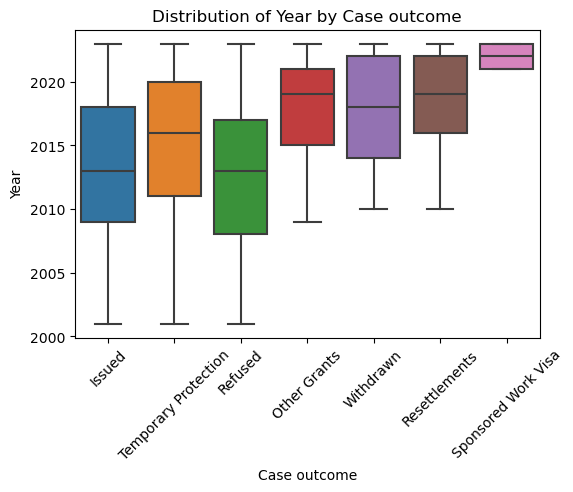

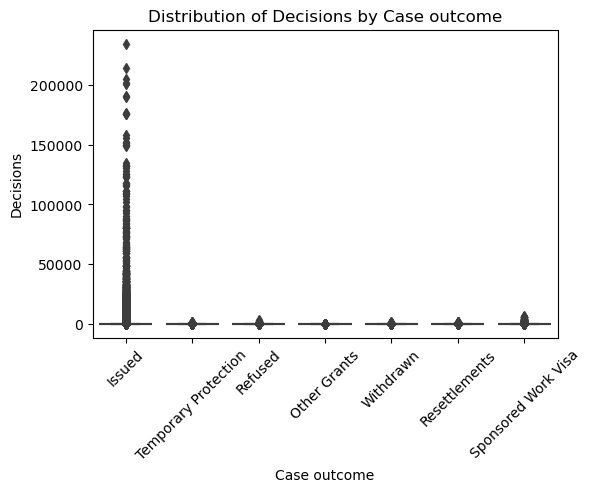

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ["Year", "Decisions"]

for attribute in attributes:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Case outcome", y=attribute, data=model_df)
    plt.title(f"Distribution of {attribute} by Case outcome")
    plt.xticks(rotation=45)  
    plt.show()


We should try to filter issued to the other categories for future iterations of the model

Moving on to correlation matrix for further analysis

We will create a mask to only show the lower triangle of the matrix (it's symetric)

This matrix will show the correlation of 'Case outcome_Issued', 'Case outcome_Rejected' to every column in the encoded df, it will be very large

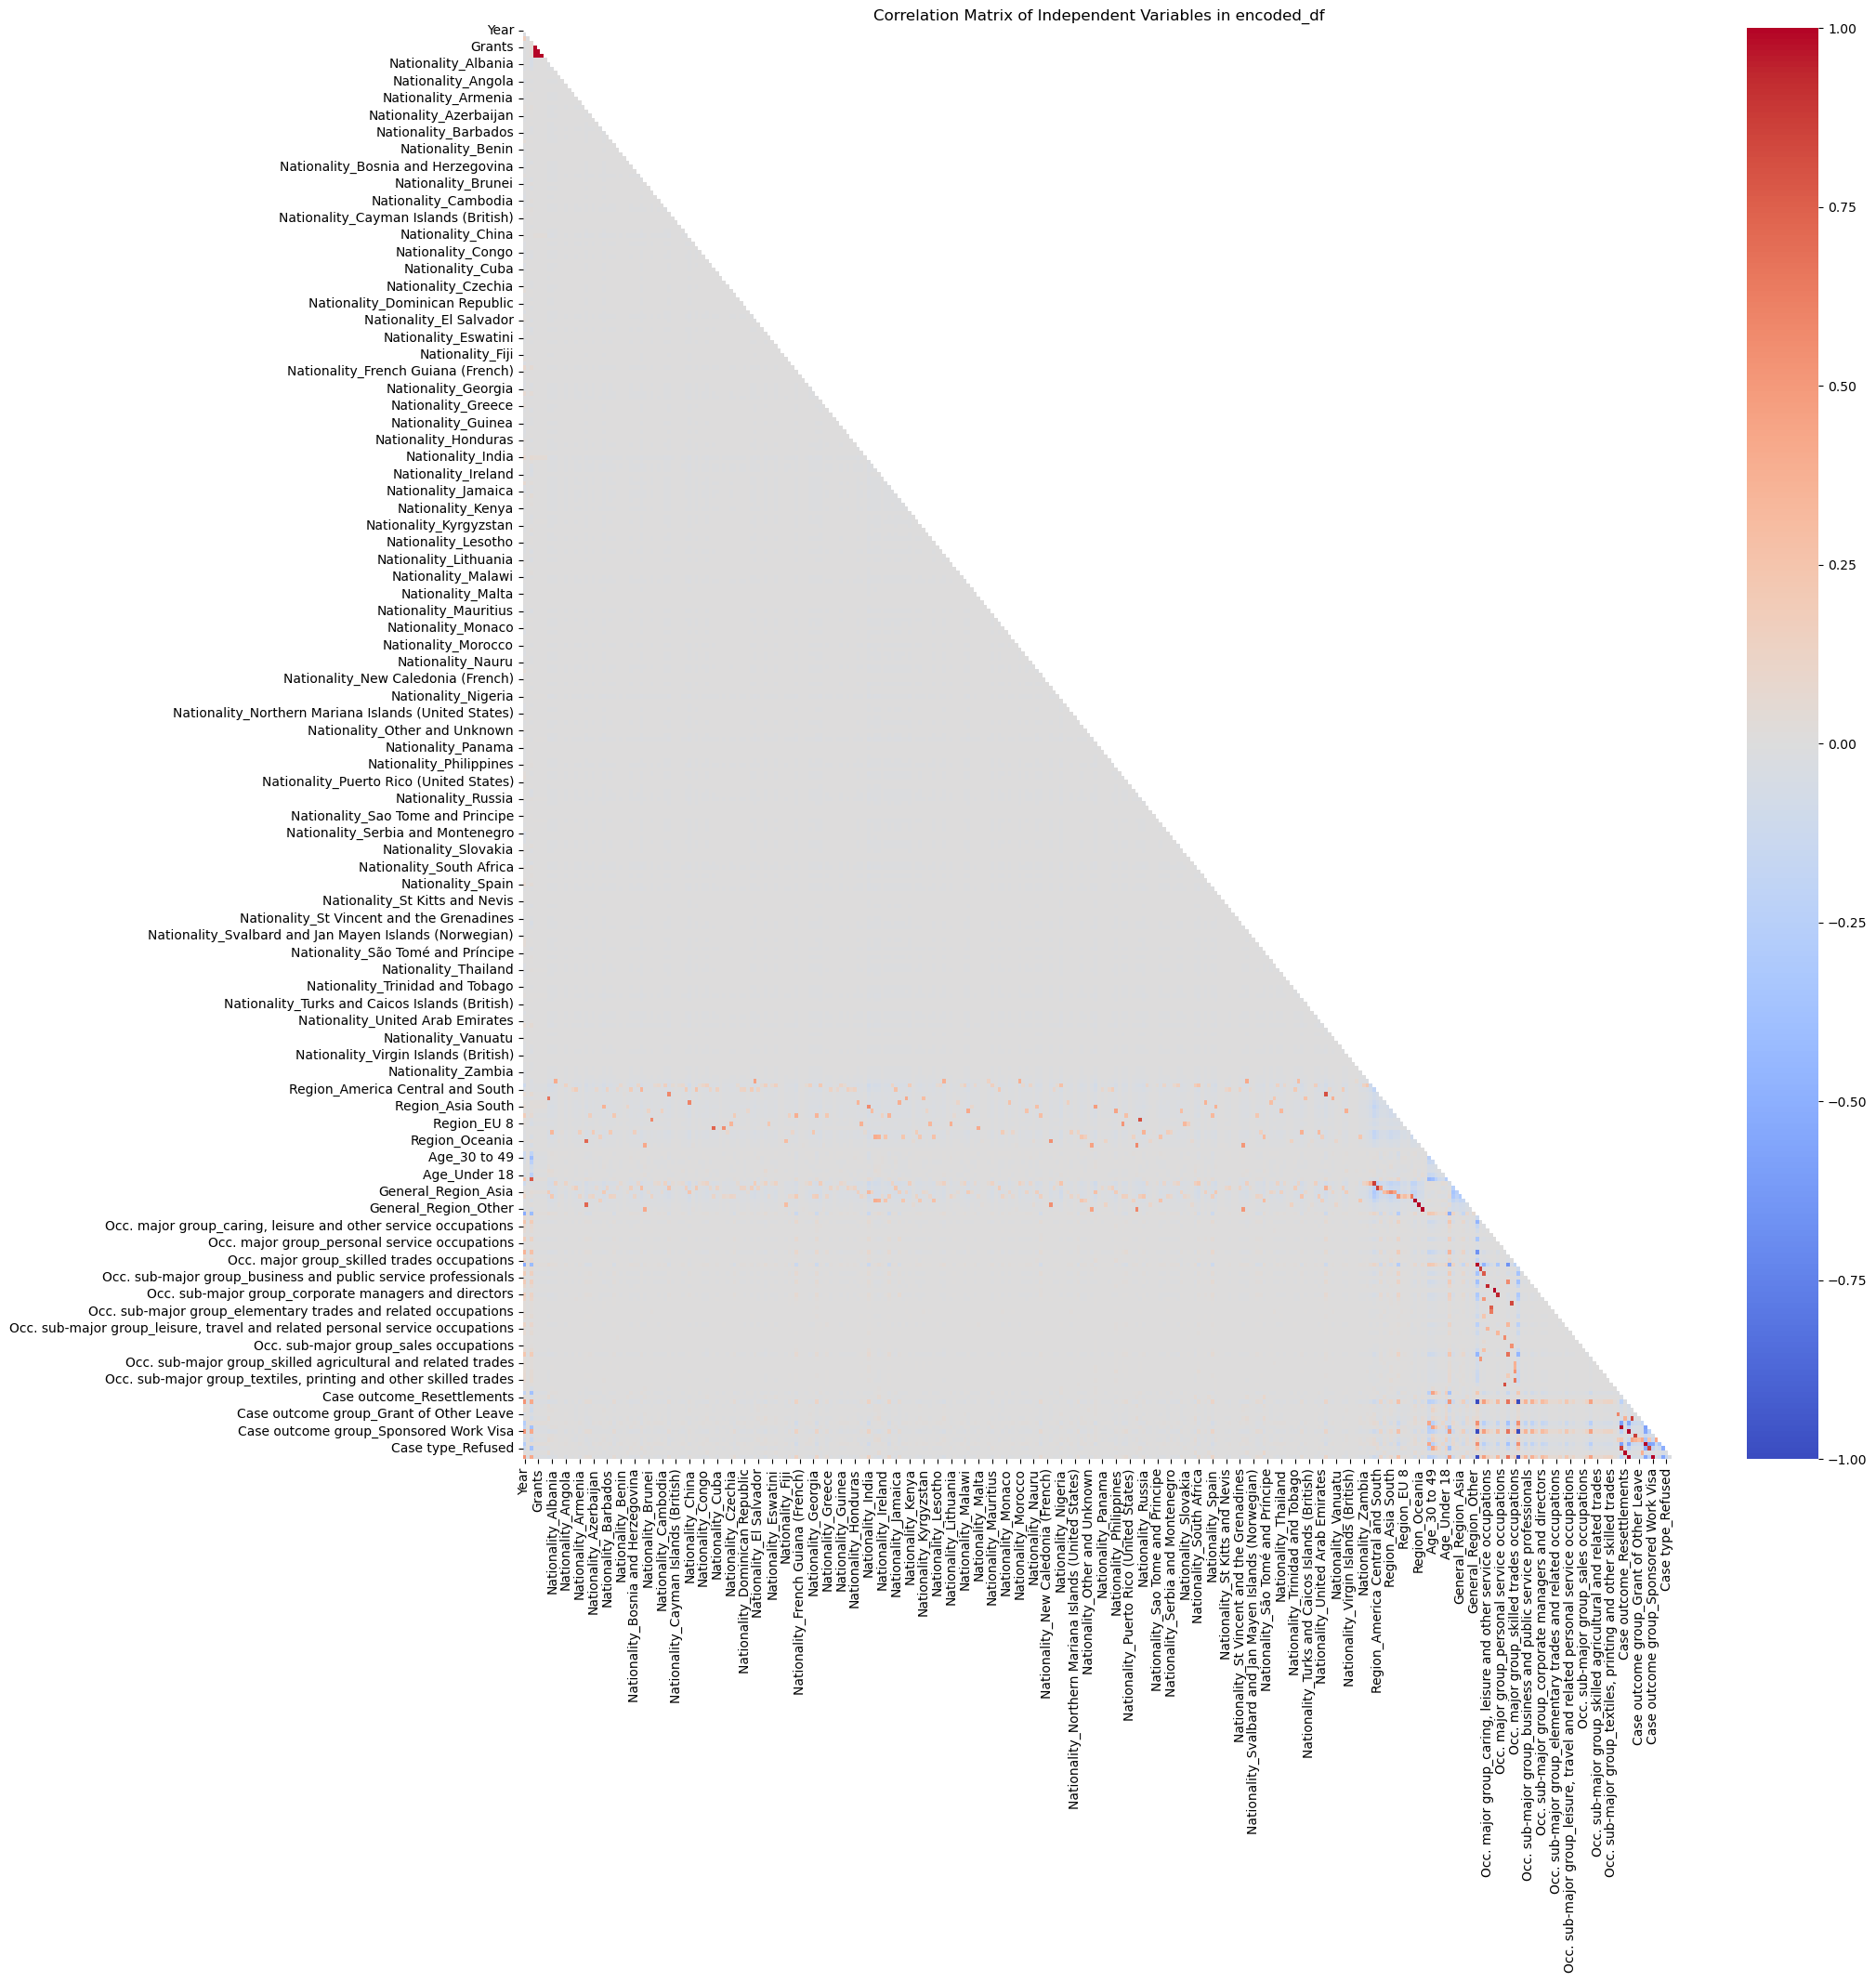

In [48]:
target_variables = ['Case outcome_Issued', 'Case outcome_Rejected']  
X_encoded = encoded_df.drop(columns=target_variables, errors='ignore')

corr_df = X_encoded.corr()

mask = np.triu(np.ones_like(corr_df, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask)
plt.title("Correlation Matrix of Independent Variables in encoded_df")
plt.show()

OK it is slightly useful to see but in later versions we can remove most of the nationalities to make it more readable

You can see that work related visas are positively correlated with ages 30-49, so that makes sense

## Baseline Modelling

Now we're going to look at training a a logistic regression model using Python's sklearn library

We're focused on a binary outcome for "Case outcome_Rejected"

We will:

1) Prepare the data
2) Spilt the data to training and testing sets
3) Initialize the model with L1 regularization 
4) Fit the model
5) Evaluate

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

This is for clean_df only, the original df, not encoded

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_df_scaled.drop(['Case outcome group_Refused'], axis=1) 
y = clean_df_scaled['Case outcome group_Refused']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100)

model.fit(X_train, y_train)

print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

#REF: https://scikit-learn.org/stable/modules/linear_model.html, https://medium.com/coinmonks/regularization-of-linear-models-with-sklearn-f88633a93a2

Training Accuracy: 0.9530201773550957
Testing Accuracy: 0.9535794700965423


Accuracy is the proportion of correctly predicted outcomes in predictions made

Looks like a pretty good training accuracy, so the model has learned well from the training data

Might be overfitting though, let's look into this after sprint 2

Let's build a confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[154767   2345]
 [  6685  30729]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    157112
           1       0.93      0.82      0.87     37414

    accuracy                           0.95    194526
   macro avg       0.94      0.90      0.92    194526
weighted avg       0.95      0.95      0.95    194526



The model predicted:

True Negative (TN) = 154,767: Correctly predicted 154,767 times when positive
False Positive (FP) = 2,345: Incorrectly predicted 2,345 times when negative
False Negative (FN) = 6,685: Incorrectly predicted 2,345 times negative when actually positive
True Positive (TP) = 30,729: Correctly predicted the positive class 30,729 times


Support is the number of count for each class:

For class 0: 157,112

For class 1: 37,414

We got 95% weighted average accuracy, so we predict both Refused and not Refused 95% of the time

Using heatmap to visualize

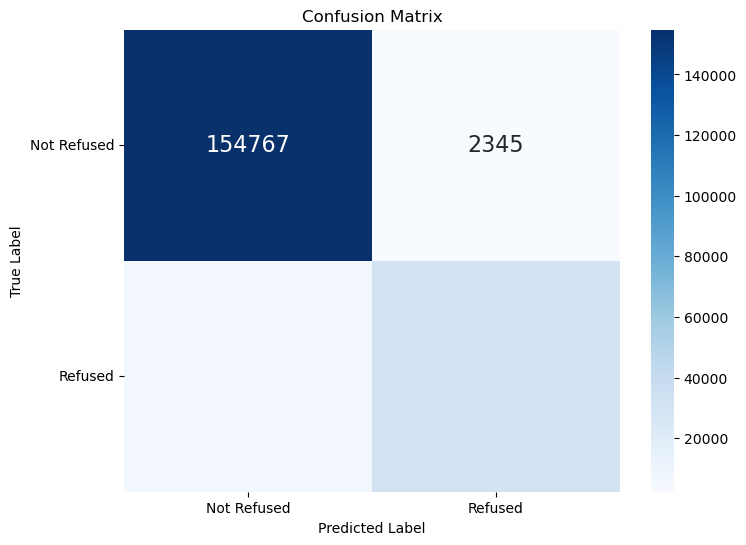

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Not Refused', 'Refused'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Not Refused', 'Refused'], rotation=0)
plt.show()


Next we will clean the data set more and add more data to the refused column 

We can also improve age and some of the other columns 

We will also experiment with feature engineering

And look at more complex models (Random Forests, SVM, KNN)

We can also include more data, would be useful to include some cost features 